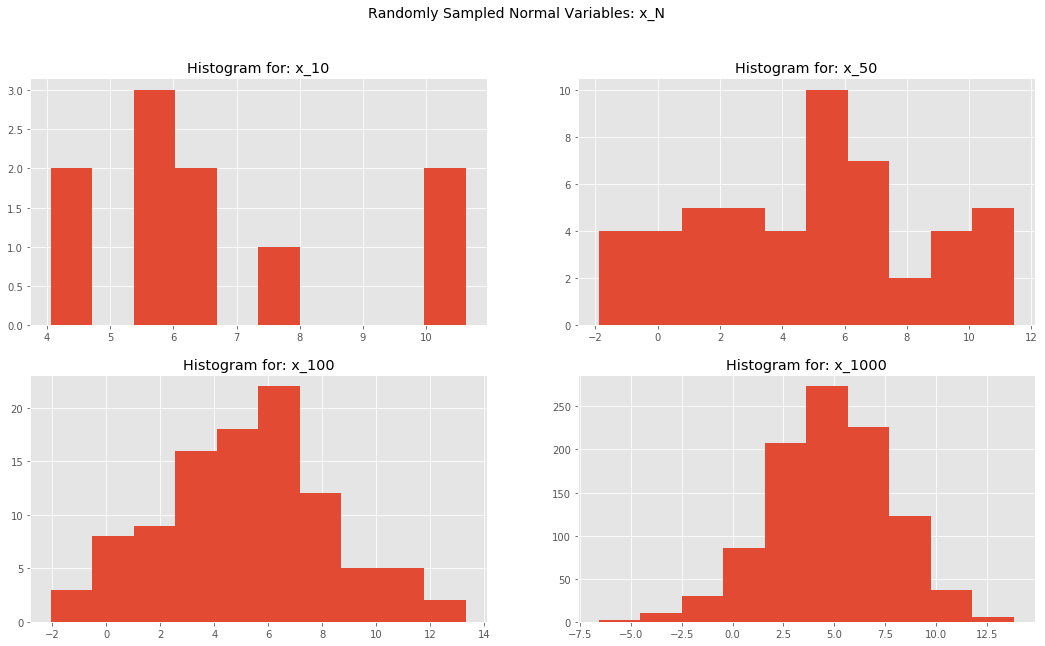

(0.8637195825576782, 0.08440198749303818)
(0.9710047245025635, 0.2541665732860565)
(0.9930154085159302, 0.8889862298965454)
(0.9976759552955627, 0.17184072732925415)
For x_10:  Don't reject normality hypothesis
None
For x_50:  Don't reject normality hypothesis
None
For x_100:  Don't reject normality hypothesis
None
For x_1000:  Don't reject normality hypothesis
None


In [182]:
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Set style
plt.style.use('ggplot')

# Start with shaprio

# mean = loc, scale = sd, size = n
x_10 = stats.norm.rvs(loc=5, scale=3, size=10)
x_50 = stats.norm.rvs(loc=5, scale=3, size=50)
x_100 = stats.norm.rvs(loc=5, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=5, scale=3, size=1000)

def four_plots():
    plt.subplot(2, 2, 1)
    plt.hist(x_10)
    plt.title('Histogram for: x_10')
    plt.subplot(2, 2, 2)
    plt.hist(x_50)
    plt.title('Histogram for: x_50')
    plt.subplot(2, 2, 3)
    plt.hist(x_100)
    plt.title('Histogram for: x_100')
    plt.subplot(2, 2, 4)
    plt.hist(x_1000)
    plt.title('Histogram for: x_1000')
    plt.suptitle('Randomly Sampled Normal Variables: x_N', fontsize=14)
    plt.show()
    

plt.figure(figsize=(18,10))
four_plots()

# Perform test
print stats.shapiro(x_10)
print stats.shapiro(x_50)
print stats.shapiro(x_100)
print stats.shapiro(x_1000)

def accept_reject(shaprio):
    if shaprio[1] > .05 :
        print "Don't reject normality hypothesis"
    else:
        print "Reject normality hypothesis"

print "For x_10: ", accept_reject(stats.shapiro(x_10))
print "For x_50: ",  accept_reject(stats.shapiro(x_50))
print "For x_100: ",  accept_reject(stats.shapiro(x_100))
print "For x_1000: ",  accept_reject(stats.shapiro(x_1000))

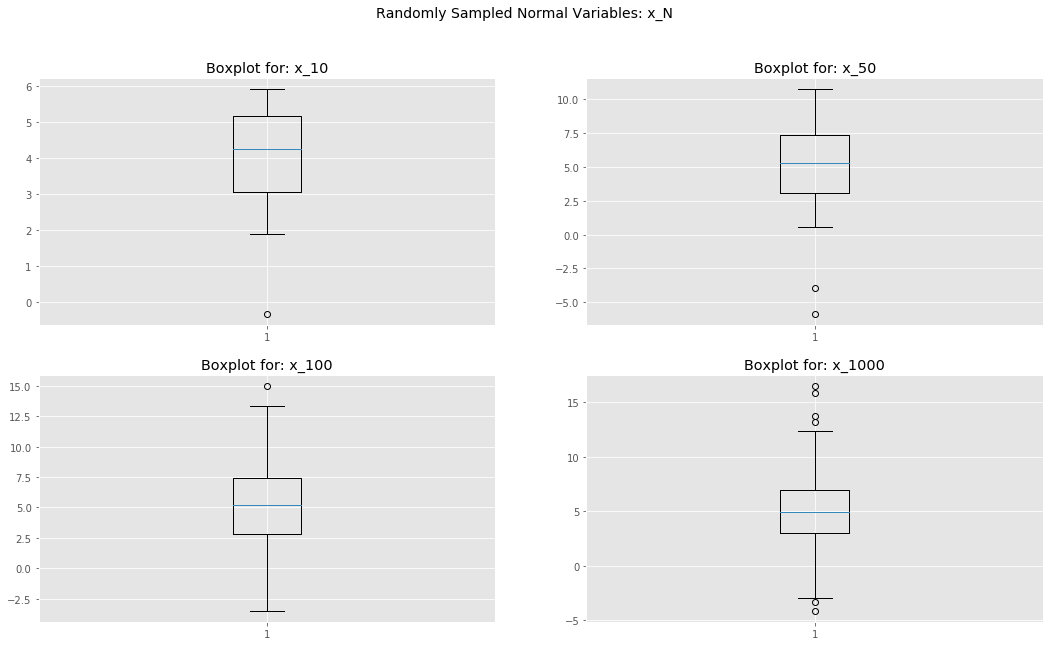

In [21]:
# Let's look at the box plots
def four_box():
    plt.subplot(2, 2, 1)
    plt.boxplot(x_10)
    plt.title('Boxplot for: x_10')
    plt.subplot(2, 2, 2)
    plt.boxplot(x_50)
    plt.title('Boxplot for: x_50')
    plt.subplot(2, 2, 3)
    plt.boxplot(x_100)
    plt.title('Boxplot for: x_100')
    plt.subplot(2, 2, 4)
    plt.boxplot(x_1000)
    plt.title('Boxplot for: x_1000')
    plt.suptitle('Randomly Sampled Normal Variables: x_N', fontsize=14)
    plt.show()
    

plt.figure(figsize=(18,10))
four_box()

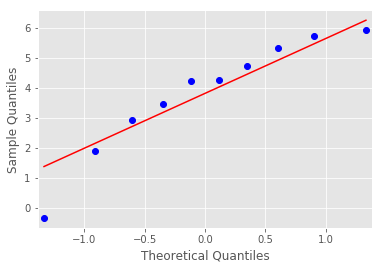

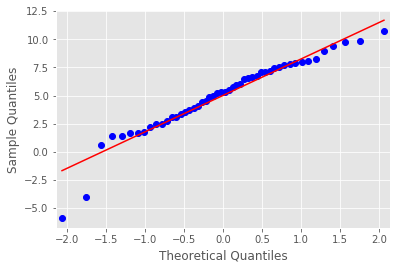

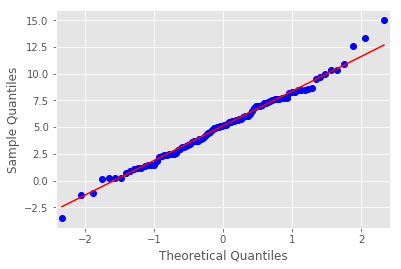

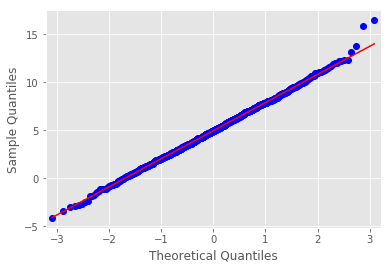

In [92]:
# Let's look at the QQ PLOT
import statsmodels.api as sm
import pylab

sm.qqplot(x_10, loc = 4, scale = 3, line='s')
sm.qqplot(x_50, loc = 4, scale = 3, line='s')
sm.qqplot(x_100, loc = 4, scale = 3, line='s')
sm.qqplot(x_1000, loc = 4, scale = 3, line='s')
pylab.show()

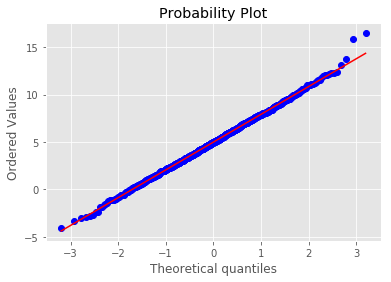

In [33]:
res = stats.probplot(x_1000, plot=plt, )

In [42]:
# Create a bimodal dataset
N = 10000
x_bimodal = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)),
                    np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]

Text(0.5,1,'Histogram of a Bimodal Distrubtion')

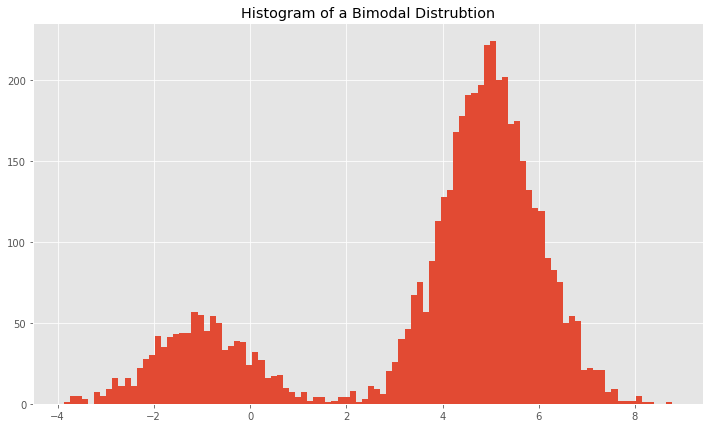

In [62]:
# Plot the bimodal data
plt.figure(figsize=(12, 7))
res = plt.hist(x_bimodal, bins=100)
plt.title("Histogram of a Bimodal Distrubtion")

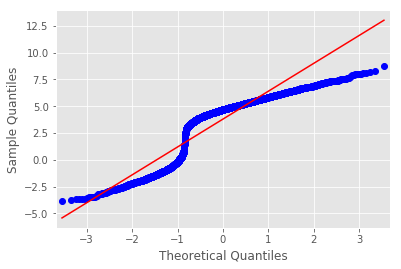

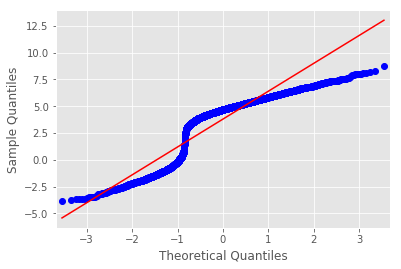

In [58]:
# QQ Plots for the bimodal data
sm.qqplot(x_bimodal[:,0], line='s')

In [104]:
# Perform test KS test
print stats.kstest(x_10, 'norm', args=(5, 3))
print stats.kstest(x_50, 'norm', args=(5, 3))
print stats.kstest(x_100, 'norm', args=(5, 3))
print stats.kstest(x_1000, 'norm', args=(5, 3))

KstestResult(statistic=0.3799548575756928, pvalue=0.08314016853183959)
KstestResult(statistic=0.08747802305302399, pvalue=0.8387908580519111)
KstestResult(statistic=0.061047174276107175, pvalue=0.8501205705664947)
KstestResult(statistic=0.0185742755283389, pvalue=0.8805510946984335)


In [101]:
stats.kstest(stats.norm.rvs(loc=0, scale=1, size=10000), 'norm')

KstestResult(statistic=0.007399934416272402, pvalue=0.6440305178704728)

In [107]:
# Try with a uniform distubtion
x_uni = np.random.rand(1000)
stats.kstest(x_uni, lambda x: x)

KstestResult(statistic=0.0271651556549517, pvalue=0.44898299308719736)

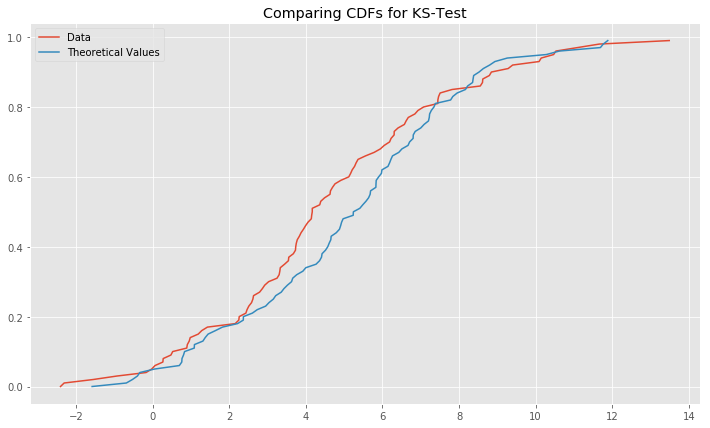

In [180]:
def ks_plot_norm(data):
    length = len(data)
    plt.figure(figsize=(12, 7))
    plt.plot(np.sort(data), np.linspace(0, 1, length, endpoint=False))
    plt.plot(np.sort(stats.norm.rvs(loc=5, scale=3, size=length)), np.linspace(0, 1, length, endpoint=False))
    plt.legend('top right')
    plt.legend(['Data', 'Theoretical Values'])
    plt.title('Comparing CDFs for KS-Test')
    
ks_plot_norm(x_100)

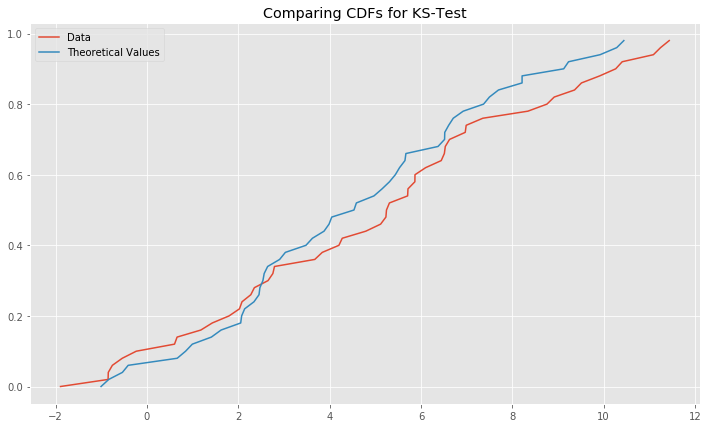

In [183]:
ks_plot_norm(x_50)

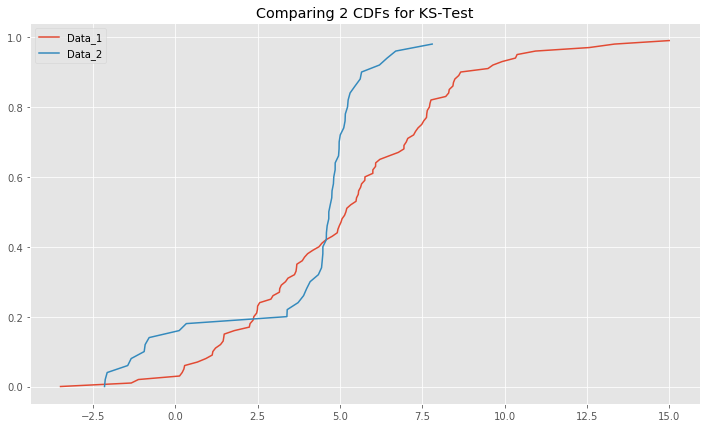

In [162]:
N = 100
x_bimodal_100 = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)),
                    np.random.normal(5, 1, int(0.4 * N))))[:, np.newaxis]

def ks_plot_comp(data_1, data_2):
    '''
    Data entereted must be the same size.
    '''
    length = len(data_1)
    plt.figure(figsize=(12, 7))
    plt.plot(np.sort(data_1), np.linspace(0, 1, len(data_1), endpoint=False))
    plt.plot(np.sort(data_2), np.linspace(0, 1, len(data_2), endpoint=False))
    plt.legend('top right')
    plt.legend(['Data_1', 'Data_2'])
    plt.title('Comparing 2 CDFs for KS-Test')
    
ks_plot_comp(x_100, x_bimodal_100[:,0])

In [164]:
stats.ks_2samp(x_100, x_bimodal_100[:,0])

Ks_2sampResult(statistic=0.35, pvalue=0.0003814088466521276)

In [168]:
# Anderson Test
anderson_results_10 = stats.anderson(x_10, dist='norm')
anderson_results_50 = stats.anderson(x_50, dist='norm')
anderson_results_100 = stats.anderson(x_100, dist='norm')
anderson_results_1000 = stats.anderson(x_1000, dist='norm')

print(anderson_results_10)
print(anderson_results_50)
print(anderson_results_100)
print(anderson_results_1000)

AndersonResult(statistic=0.3521093053080939, critical_values=array([0.501, 0.57 , 0.684, 0.798, 0.95 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.5486337673481927, critical_values=array([0.538, 0.613, 0.736, 0.858, 1.021]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.22102316806527256, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
AndersonResult(statistic=0.127392173654016, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [173]:
stats.anderson(x_bimodal_100[:,0], dist='logistic')

AndersonResult(statistic=4.648178071389843, critical_values=array([0.424, 0.56 , 0.657, 0.765, 0.901, 1.005]), significance_level=array([25. , 10. ,  5. ,  2.5,  1. ,  0.5]))